In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
#import matplotlib.dates as mdates
import datetime
import time
import pandas_datareader.data as web
import seaborn as sns
#from mpl_finance import candlestick_ohlc
%matplotlib inline

In [579]:
end = datetime.datetime.today()
start = end - datetime.timedelta(days=365*1)
#df = web.DataReader(['WM','NEE','MSFT','SPY'],'yahoo',start=start,end=end)
#df['Date'] = [mdates.date2num(d) for d in df.index]
df = web.DataReader('MSFT','yahoo',start=start,end=end)


In [580]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-29,98.879997,97.230003,97.839996,98.010002,28671000.0,96.443893
2018-05-30,99.250000,97.910004,98.309998,98.949997,22158500.0,97.368874
2018-05-31,99.989998,98.610001,99.290001,98.839996,34140900.0,97.260628
2018-06-01,100.860001,99.169998,99.279999,100.790001,28655600.0,99.179474
2018-06-04,101.860001,100.849998,101.260002,101.669998,27281600.0,100.045410


In [581]:
price = df['Adj Close']

In [582]:
twelve_day = price.ewm(span=12).mean()
twentysix_day = price.ewm(span=26).mean()

In [583]:
price = price.iloc[28:]
twelve_day = twelve_day.iloc[28:]
twentysix_day = twentysix_day.iloc[28:]

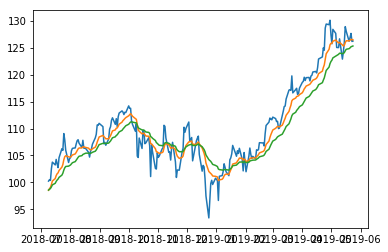

In [584]:
pp.plot(price)
pp.plot(twelve_day)
pp.plot(twentysix_day)

In [585]:
macd = twelve_day - twentysix_day
signal = macd.ewm(span=9).mean()
price = price.iloc[10:]
twelve_day = twelve_day.iloc[10:]
twentysix_day = twentysix_day.iloc[10:]
macd = macd.iloc[10:]
signal = signal.iloc[10:]

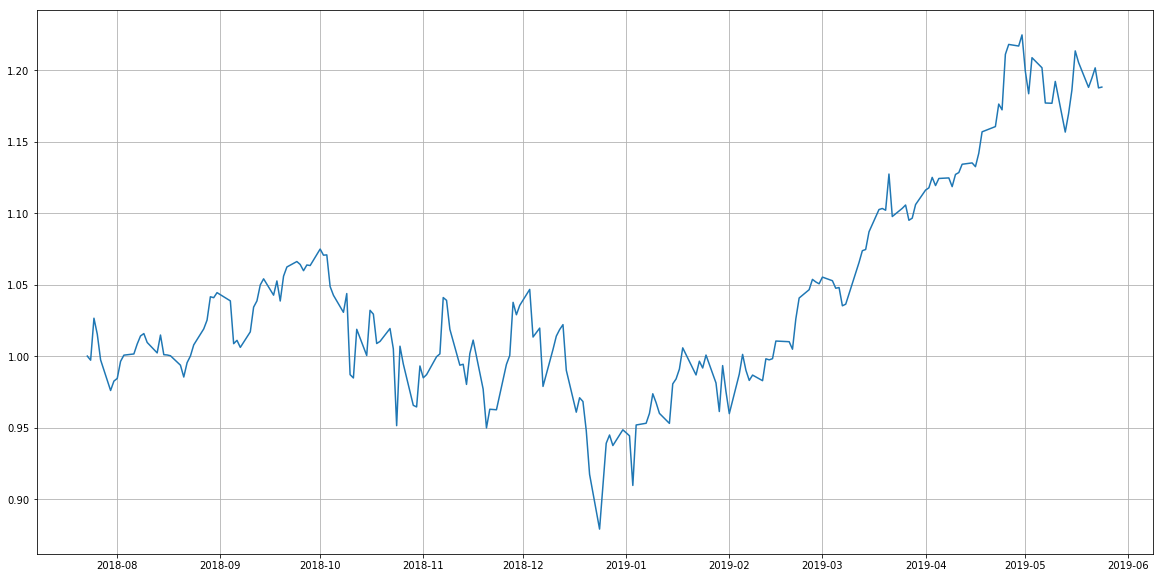

In [586]:
pp.figure(figsize=(20,10))
pp.plot(price /price.iloc[0])
pp.grid()

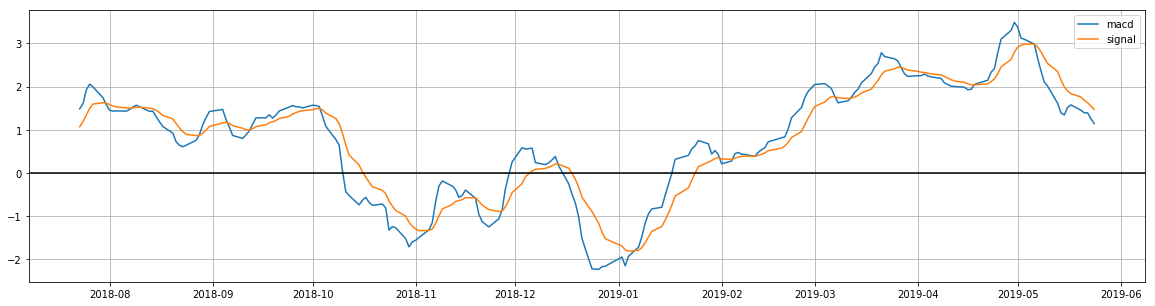

In [587]:
pp.figure(figsize=(20,5))
pp.plot(macd,label='macd')
pp.plot(signal,label='signal')
pp.axhline(y=0,color='black')
pp.grid()
pp.legend()

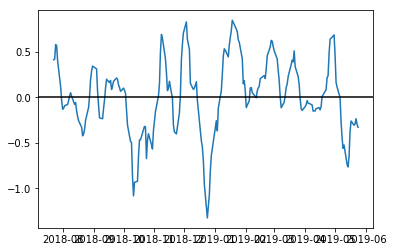

In [588]:
pp.plot(macd - signal)
pp.axhline(y=0,color='black')

In [589]:
crossovers = macd - signal

In [591]:
holding = pd.Series(index=crossovers.index,data=0)

In [592]:
for d in range(len(holding.index))[2:]:
    if crossovers.iloc[d-2] < 0 and crossovers.iloc[d-1] >= 0:
        holding.iloc[d:] = 1
    elif crossovers.iloc[d-2] > 0 and crossovers.iloc[d-1] <= 0:
        holding.iloc[d:] = 0


In [593]:
holding = holding.iloc[2:]

In [594]:
daily_ret = ((price / price.shift(1))-1).iloc[2:]

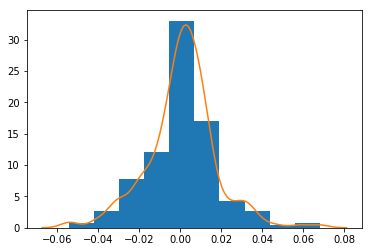

In [595]:
pp.hist(daily_ret,density=True)
sns.kdeplot(daily_ret.values)

In [596]:
#d = holding * daily_ret

In [597]:
#value = pd.Series(index=d.index,data=0)

In [598]:
portfolio = pd.Series(index=holding.index,data=0)
hodl = pd.Series(index=holding.index,data=0)
cash = 1000
hodl_cash = 1000
for i in range(len(holding.index)):
    hodl.iloc[i] = hodl_cash + (hodl_cash*daily_ret.iloc[i])
    hodl_cash = hodl_cash + (hodl_cash*daily_ret.iloc[i])
    portfolio.iloc[i] = cash + (cash*holding.iloc[i]*daily_ret.iloc[i])
    cash = cash + (cash*holding.iloc[i]*daily_ret.iloc[i])

In [599]:
print(cash)
print(hodl_cash)

1031.8526626147022
1191.621281937828


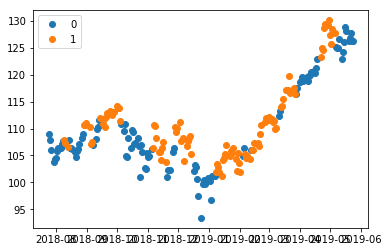

In [600]:
for h in holding.unique():
    dates = holding[holding == h].index
    pp.plot(price.loc[dates],'o',label=h)
pp.legend()

In [605]:
portfolio_returns = ((portfolio / portfolio.shift(1))-1).iloc[1:]

In [606]:
hodl_returns = ((hodl / hodl.shift(1))-1).iloc[1:]

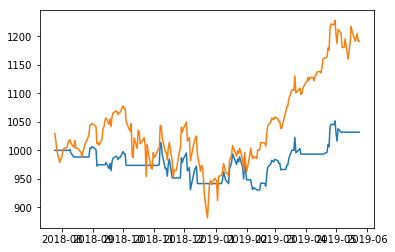

In [607]:
pp.plot(portfolio)
pp.plot(hodl)